In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from mplsoccer import Pitch, add_image, FontManager
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
import matplotlib.image as mpimg
from pywaffle import Waffle
from highlight_text import fig_text

In [35]:
opponent = 'Granada'
team = "Barcelona"
df = pd.read_csv(f"/work/assets/fbref/teamStats/barcelona/match/2021/#17/PossessiongAway.csv") # bilbao
df = pd.read_csv(f'/work/assets/fbref/teamStats/barcelona/match/2021/#12/SummaryAway.csv') # sociedad



In [142]:
comp = "liga"
seasons = ["2021","2122"]
df2021 = []
df2122 = []
for season in seasons:
    df_def = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/defense.csv")
    df_gs = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/gca.csv")
    df_mis = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/misc.csv")
    df_pass = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing.csv")
    df_ptype = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing_types.csv")
    df_pos = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/possession.csv")
    df_shot = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/shooting.csv")
    df_stan = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/standard.csv")
    df = pd.concat([df_def, 
                    df_gs, df_mis, 
                    df_pass, 
                    df_ptype, df_pos, 
                    df_shot, 
                    df_stan], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
#     df = df.dropna()
    
    if season == "2021":
        df2021 = df
    elif season == "2122":
        df2122 = df


def setup(df):
#     df = df[df["Player"].str.contains("Ronald Araújo")]
    df = df[["Player", "Pos", '90s', 'Tkl_Tackles', 'TklW_Tackles','Press_Pressures','Succ_Pressures','%_Pressures',
             'Int', 'Sh_Blocks',
             'Won%_Aerial Duels','Cmp%_Total',
             'Cmp_Short', 'Cmp_Medium','Cmp_Long']]

#     df.loc[:, ['Tkl_Tackles',"TklW_Tackles",'Int','Sh_Blocks','Press_Pressures','Succ_Pressures','Sw_Pass Types']] = \
#         df.loc[:, ['Tkl_Tackles',"TklW_Tackles",'Int','Sh_Blocks','Press_Pressures','Succ_Pressures','Sw_Pass Types']].apply(lambda x:x/df["90s"])

#     df = df[(df["Player"].str.contains("Ronald Araújo"))|(df["Player"].str.contains("Eric García"))|(df["Player"].str.contains("Píque"))]
#     df = df.drop(columns=["90s","Player"])
    return df

df1 = setup(df2021)
df2 = setup(df2122)

In [143]:
def setup2(df):
    df = df[df["Pos"]=="DF"]
    df = df[["Player",'Cmp_Short', 'Cmp_Medium','Cmp_Long']]    
    df.reset_index(inplace=True,drop=True)
    lastIdx = len(df)
    df.loc[lastIdx,:] = df.mean()
    df.loc[lastIdx,"Player"] = "League DF Average"
    print(df.loc[lastIdx,:])
    df = df[(df["Player"].str.contains("Ronald Araújo"))|(df["Player"].str.contains("Eric García"))|(df["Player"].str.contains("Piqué"))]
    return df

In [144]:
df1 = setup2(df1)
df2 = setup2(df2)
dfMean = pd.DataFrame({"Player":"Mean","Cmp_Short":240.829412,"Cmp_Medium":322.670588,"Cmp_Long":111.288235},index=[0])

Player        League DF Average
Cmp_Short            240.829412
Cmp_Medium           322.670588
Cmp_Long             111.288235
Name: 170, dtype: object
Player        League DF Average
Cmp_Short             59.141935
Cmp_Medium            81.690323
Cmp_Long              28.445161
Name: 155, dtype: object


In [146]:
df1.reset_index(drop=True,inplace=True)
df2.reset_index(drop=True,inplace=True)

df2

,Player,Cmp_Short,Cmp_Medium,Cmp_Long
0,Ronald Araújo,96.0,204.0,34.0
1,Eric García,99.0,180.0,72.0
2,Gerard Piqué,75.0,190.0,51.0


In [147]:
# df['Player'] = df['Player'].str.split(' ', expand=True)
# df = df.sort_values(by=['Touches_Touches'], ascending=False)

In [148]:
# df.drop(columns=["Unnamed: 0","#"],inplace=True)


In [149]:
# df.columns = df.iloc[1]
# df = df[["Player","Def Pen_Touches","Def 3rd_Touches","Mid 3rd_Touches","Att 3rd_Touches","Att Pen_Touches"]]


In [150]:
# df.reset_index(inplace=True,drop=True)
# df

In [151]:
# df.loc[0,"Player"] = "All"


In [152]:
df1

,Player,Cmp_Short,Cmp_Medium,Cmp_Long
0,Ronald Araújo,302.0,552.0,125.0
1,Gerard Piqué,321.0,666.0,173.0


In [153]:
labelList = df2.loc[:,"Player"]
labelList = labelList.values.tolist()
labelList

['Ronald Araújo', 'Eric García', 'Gerard Piqué']

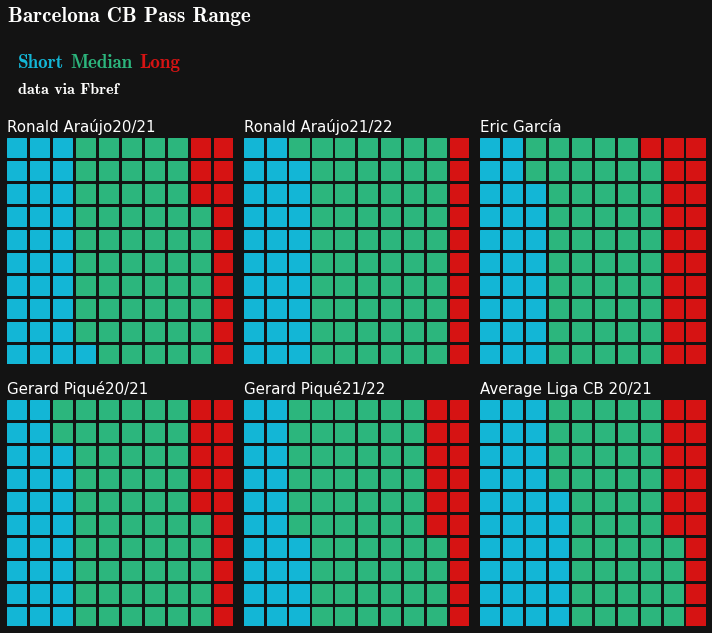

In [158]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10,
    columns=10,
    figsize=(10,10),
    plots={
        '231':{
            'values':df1.iloc[0,1:],
            'title':{
                'label':labelList[0]+"20/21",
                'color':'white',
                'loc':'left',
                'fontsize':15},          
        },
        '232':{
            'values':df2.iloc[0,1:],
            'title':{
                'label':labelList[0]+"21/22",
                'color':'white',
                'loc':'left',
                'fontsize':15},          
        },
        '233':{
            'values':df2.iloc[1,1:],
            'title':{
                "label":labelList[1],
                'color':'white',
                'loc':'left',
                'fontsize':15},
        },
        '234':{
            'values':df1.iloc[1,1:],
            'title':{
                'label':labelList[2]+"20/21",
                'color':'white',
                'loc':'left',
                'fontsize':15},
        },
        '235':{
            'values':df2.iloc[2,1:],
            'title':{
                'label':labelList[2]+"21/22",
                'color':'white',
                'loc':'left',
                'fontsize':15},            
        },
        '236':{
            'values':dfMean.iloc[-1,1:],
            'title':{
                'label':"Average Liga CB 20/21",
                'color':'white',
                'loc':'left',
                'fontsize':15},            
#         },
#         '346':{
#             'values':df.iloc[6,1:],
#             'title':{
#                 'label':labelList[6],
#                 'color':'white',
#                 'loc':'left',
#                 'fontsize':15},            
#         },
#         '347':{
#             'values':df.iloc[7,1:],
#             'title':{
#                 'label':labelList[7],
#                 'color':'white',
#                 'loc':'left',
#                 'fontsize':15},            
#         },
#         '348':{
#             'values':df.iloc[8,1:],
#             'title':{
#                 'label':labelList[8],
#                 'color':'white',
#                 'loc':'left',
#                 'fontsize':15},            
        },
    },colors=['#13B6D6', '#2cb67d', '#D61313']
#     colors=('#7f5af0', '#4fc4cf', '#2cb67d', '#ff8906', '#ef4565')
)
# add_image(image, fig, left=0.8, bottom=0.988, width=0.15)

fig.suptitle(t=f"{team} CB Pass Range",
             x=0.184,y=1,color="#fffffe",fontsize=21, fontname="cmb10")

fig.text(x=0.03,y=.88,s="data via Fbref",color="#fffffe",fontsize=16, fontname="cmb10")

fig_text(
    s=f"<Short> <Median> <Long>",
    x=.03,
    y=.91,
    fontsize=19,
    fontname="cmb10",
    color='#fffffe',
#     highlight_colors=['#7f5af0', '#4fc4cf', '#2cb67d', '#ff8906', '#ef4565']
    highlight_colors=['#13B6D6', '#2cb67d', "#D61313"]
    
    
)
fig.patch.set_facecolor('#131313')

# fig = plt.figure(
#     FigureClass=Waffle, 
#     rows=10,
#     columns=10,
#     figsize=(10,10),
#     plots={
#         '131':{
#             'values':df.iloc[9,1:],
#             'title':{
#                 'label':labelList[9],
#                 'color':'white',
#                 'loc':'left',
#                 'fontsize':15},          
#         },
#         '132':{
#             'values':df.iloc[10,1:],
#             'title':{
#                 'label':labelList[10],
#                 'color':'white',
#                 'loc':'left',
#                 'fontsize':15},
#         },
#         '133':{
#             'values':df.iloc[11,1:],
#             'title':{
#                 'label':labelList[11],
#                 'color':'white',
#                 'loc':'left',
#                 'fontsize':15},
                
#         }},
#     colors=('#7f5af0', '#4fc4cf', '#2cb67d', '#ff8906', '#ef4565'))
# fig.patch.set_facecolor('#131313')
plt.savefig(f'/work/output/waffle.png', dpi=200, bbox_inches="tight",facecolor='#131313')

In [126]:
import matplotlib as mpl
import matplotlib.pyplot as plt  # これを呼ばないと matplotlib.font_manager にアクセスできない


def show_avaiable_fonts():
    print("Avaiable fonts:")
    for font in mpl.font_manager.findSystemFonts():
        fontname = mpl.font_manager.FontProperties(fname=font).get_name()
        print(f"* {fontname}")


# 利用可能なフォントを表示する。
show_avaiable_fonts()

Avaiable fonts:
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* DejaVu Serif
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* DejaVu Sans Mono
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* DejaVu Sans
* Noto Sans
* DejaVu Serif
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* DejaVu Sans
* Noto Sans
* Noto Sans
* DejaVu Sans Mono
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
* Noto Sans
